In [1]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 12.15 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [6]:
!tar -xvzf workspace-1572420406.tar.gz

./
./home/
./home/2_Training.ipynb
./home/.ipynb_checkpoints/
./home/.ipynb_checkpoints/0_Dataset-checkpoint.ipynb
./home/.ipynb_checkpoints/2_Training-checkpoint.ipynb
./home/.ipynb_checkpoints/3_Inference-checkpoint.ipynb
./home/.ipynb_checkpoints/4_Zip Your Project Files and Submit-checkpoint.ipynb
./home/.ipynb_checkpoints/1_Preliminaries-checkpoint.ipynb
./home/0_Dataset.ipynb
./home/model.py
./home/vocabulary.py
./home/4_Zip Your Project Files and Submit.ipynb
./home/images/
./home/images/encoder.png
./home/images/encoder-decoder.png
./home/images/decoder.png
./home/images/download_ex.png
./home/images/coco-examples.jpg
./home/3_Inference.ipynb
./home/1_Preliminaries.ipynb
./home/models/
./home/data_loader.py
./home/filelist.txt


In [0]:
!mv ./home/* .

In [4]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

--2019-10-31 14:45:08--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.227.208
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.227.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  36.7MB/s    in 7.1s    

2019-10-31 14:45:16 (33.8 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



In [9]:
!unzip annotations_trainval2014.zip -d cocoapi

Archive:  annotations_trainval2014.zip
  inflating: cocoapi/annotations/instances_train2014.json  
  inflating: cocoapi/annotations/instances_val2014.json  
  inflating: cocoapi/annotations/person_keypoints_train2014.json  
  inflating: cocoapi/annotations/person_keypoints_val2014.json  
  inflating: cocoapi/annotations/captions_train2014.json  
  inflating: cocoapi/annotations/captions_val2014.json  


# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](./images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [11]:
import os
import sys
sys.path.append('cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = 'cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=5.71s)
creating index...
index created!
loading annotations into memory...
Done (t=0.35s)
creating index...
index created!


## Exploring

In [19]:
list(coco.anns.keys())[:5]

[156, 509, 603, 918, 1072]

In [21]:
coco.anns[156]

{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

In [22]:
coco.cats

{1: {'id': 1, 'name': 'person', 'supercategory': 'person'},
 2: {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 3: {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 4: {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 5: {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 6: {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 7: {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 8: {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 9: {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 10: {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 11: {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 13: {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 14: {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 15: {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 16: {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 17: {'id': 17, 'name': 'cat', 'supercategory': 'animal'},

In [27]:
for i in coco.catToImgs:
  print(len(coco.catToImgs[i])) ## number of samples in each category

1022
1952
3077
2057
3956
1669
2194
3216
2841
8384
1927
13135
5244
2474
15014
3075
1445
2027
1602
3599
88153
686
3979
2253
2218
1461
1450
2236
888
2273
634
3338
4362
650
512
3500
1863
1767
935
2189
794
2852
1022
1206
1710
2234
1626
2638
7036
1776
2560
2131
4920
2925
1782
2089
2697
2684
2105
2540
2118
1463
1786
851
1864
1028
539
1175
78
1902
8561
2267
444
1542
74
2891
4116
2244
1886
462


In [28]:
len(coco.catToImgs), len(coco.cats)

(80, 80)

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000243896.jpg


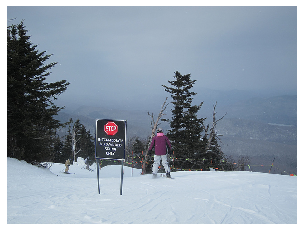

A skier standing behind a difficulty level sign on the slope
A man standing on top of a snow covered ski slope,
The skier is starting down the advanced slope.
A skier is poised to go down the slope.
a person standing on a snow covered slope 


In [12]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [31]:
coco.loadImgs(img_id)

[{'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000243896.jpg',
  'date_captured': '2013-11-17 08:24:43',
  'file_name': 'COCO_val2014_000000243896.jpg',
  'flickr_url': 'http://farm8.staticflickr.com/7009/6850055733_bef52a2bca_z.jpg',
  'height': 480,
  'id': 243896,
  'license': 1,
  'width': 640}]

In [32]:
coco_caps.loadAnns(annIds)

[{'caption': 'A skier standing behind a difficulty level sign on the slope',
  'id': 485929,
  'image_id': 243896},
 {'caption': 'A man standing on top of a snow covered ski slope,',
  'id': 489694,
  'image_id': 243896},
 {'caption': 'The skier is starting down the advanced slope.',
  'id': 490333,
  'image_id': 243896},
 {'caption': 'A skier is poised to go down the slope.',
  'id': 498559,
  'image_id': 243896},
 {'caption': 'a person standing on a snow covered slope ',
  'id': 498961,
  'image_id': 243896}]

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)